In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ['OMP_NUM_THREADS'] = '1'


# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
data


,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.00,3722.280000,70.275319,13.193760,0.31251,176.440,20.908880,0.0,0.44672,0.001574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,C0095,P0270,BAS,TER,U,43,F,False,76.340708,75.181897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,C0096,P0271,BAS,TER,R,67,M,False,436.828426,260.200509,...,765.53,346.252856,18.308317,3.402625,0.00777,22.004,4.918505,0.0,0.47207,0.011223
100,C0097,P0274,ICA,LAT,R,84,F,False,94.271201,100.528873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,C0098,P0286,MCA,TER,R,59,F,False,1022.481082,466.087643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(f'{data.columns}\n {data.shape}')

characteristics = [f'{data.columns}']



Index(['case_id', 'patient_id', 'aneurysmLocation', 'aneurysmType',
       'ruptureStatus', 'age', 'sex', 'multipleAneurysms', 'sacVolume',
       'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea',
       'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis',
       'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea',
       'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize',
       'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star',
       'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'sacMinPressure',
       'sacMaxPressure', 'sacMeanPressure', 'sacMaxSpeed', 'sacMeanSpeed',
       'sacMinTAWSS', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI',
       'sacMeanOSI', 'vesselName', 'length', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'minPressure', 'maxPressure', '

In [3]:
data.dtypes

case_id              object
patient_id           object
aneurysmLocation     object
aneurysmType         object
ruptureStatus        object
                     ...   
maxTAWSS            float64
meanTAWSS           float64
minOSI              float64
maxOSI              float64
meanOSI             float64
Length: 62, dtype: object

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables to numeric
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



For n_clusters = 2, the average silhouette_score is 0.6854908762843417
For n_clusters = 3, the average silhouette_score is 0.5359100418596378


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

For n_clusters = 4, the average silhouette_score is 0.5378168421531726
For n_clusters = 5, the average silhouette_score is 0.4999442171433185
For n_clusters = 6, the average silhouette_score is 0.48000439224797964
For n_clusters = 7, the average silhouette_score is 0.31674935615509586
For n_clusters = 8, the average silhouette_score is 0.3434097174791286


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

For n_clusters = 9, the average silhouette_score is 0.3484512665983928
For n_clusters = 10, the average silhouette_score is 0.3310032714954656


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


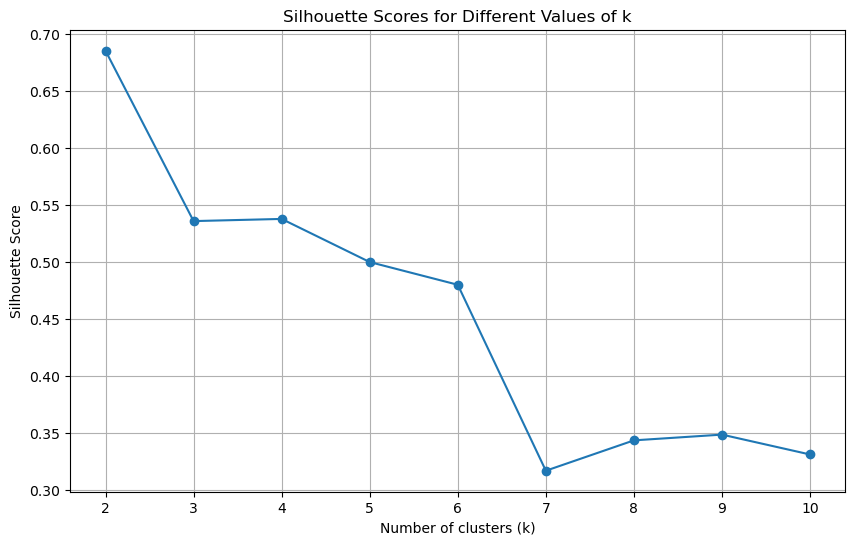

In [5]:
import pandas as pd
import numpy as np


# Define the range of k values to evaluate
k_values = range(2, 11)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Example parameters to tune
perplexities = [5, 30, 50]
learning_rates = [10, 200, 1000]
n_iters = [250, 500, 1000]

# Store results for comparison
results = []

for p in perplexities:
    for lr in learning_rates:
        for n_iter in n_iters:
            tsne = TSNE(n_components=2, perplexity=p, learning_rate=lr, n_iter=n_iter, random_state=42)
            tsne_results = tsne.fit_transform(scaled_data)
            
            kmeans_tsne = KMeans(n_clusters=2, random_state=42)
            clusters_tsne = kmeans_tsne.fit_predict(tsne_results)
            
            silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
            
            results.append((p, lr, n_iter, silhouette_tsne))
            print(f'Perplexity: {p}, Learning Rate: {lr}, n_iter: {n_iter}, Silhouette Score: {silhouette_tsne}')

# Find the best parameters
best_params = max(results, key=lambda x: x[3])
print(f'Best parameters: Perplexity: {best_params[0]}, Learning Rate: {best_params[1]}, n_iter: {best_params[2]}, Silhouette Score: {best_params[3]}')


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.8571164011955261
Perplexity: 5, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5797255635261536


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.6011251211166382
Perplexity: 5, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.4608520567417145


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.49385496973991394


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.47085511684417725
Perplexity: 5, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.7166614532470703


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.6720711588859558


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.3176049590110779
Perplexity: 30, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.5371966361999512


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5371339917182922


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.5380108952522278
Perplexity: 30, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.8178430795669556


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.5494833588600159


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.5433991551399231
Perplexity: 30, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.8292056918144226


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.8130588531494141


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.807427704334259
Perplexity: 50, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.5053805112838745


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5043721199035645


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.5043559074401855
Perplexity: 50, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.36337724328041077


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.5031205415725708


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.503002405166626
Perplexity: 50, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.6283420324325562


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.31563612818717957
Perplexity: 50, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.3477279841899872
Best parameters: Perplexity: 5, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.8571164011955261


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (t-SNE with Optimal Parameters): 0.8571164011955261


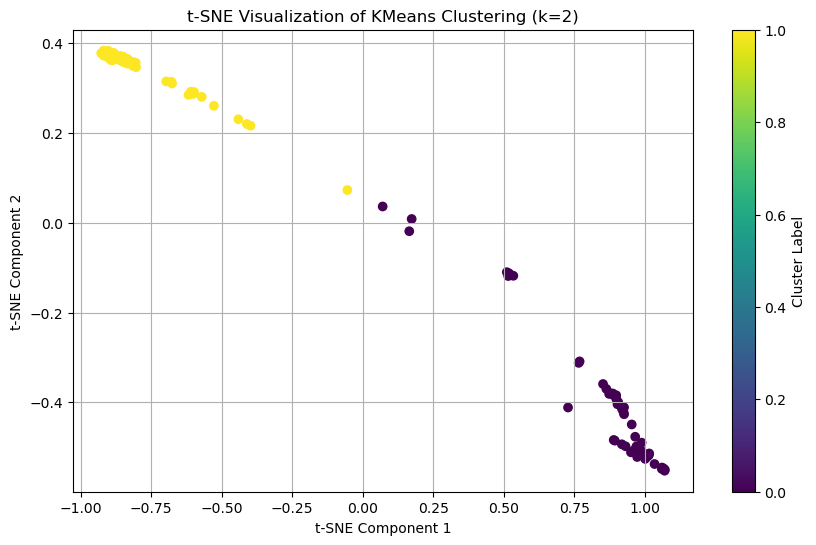

In [7]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply t-SNE with optimal parameters
tsne = TSNE(n_components=2, perplexity=5, learning_rate=10, n_iter=250, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Reapply KMeans clustering with the results
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_results)

# Compute silhouette score on t-SNE results
silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
print(f'Silhouette Score (t-SNE with Optimal Parameters): {silhouette_tsne}')

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters_tsne, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of KMeans Clustering (k=2)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [8]:
import numpy as np

# Re-run KMeans multiple times
n_runs = 10
stability_scores = []

for _ in range(n_runs):
    clusters_tsne = KMeans(n_clusters=2, random_state=np.random.randint(0, 10000)).fit_predict(tsne_results)
    silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
    stability_scores.append(silhouette_tsne)

print(f'Stability Scores: {stability_scores}')
print(f'Average Silhouette Score: {np.mean(stability_scores)}')
print(f'Standard Deviation of Silhouette Scores: {np.std(stability_scores)}')


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Stability Scores: [0.8571164, 0.8561941, 0.8561941, 0.8561941, 0.8561941, 0.8561941, 0.8571164, 0.8561941, 0.8561941, 0.8561941]
Average Silhouette Score: 0.8563785552978516
Standard Deviation of Silhouette Scores: 0.0003689289151225239


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
import pandas as pd

# Add cluster labels to the original data
data['Cluster'] = clusters_tsne

# Calculate descriptive statistics
descriptive_stats = data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])

# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Adjust width to fit the content

# Display descriptive statistics
print(descriptive_stats)


               age                      sacVolume                        \
              mean        std min max        mean         std       min   
Cluster                                                                   
0        53.363636  13.811380  24  77  124.635181  149.120494  2.339496   
1        55.958333  13.756172  26  85  302.936329  355.700855  9.376307   

                     sacSurfaceArea                                     \
                 max           mean         std        min         max   
Cluster                                                                  
0         656.896755     105.106283   88.156064   7.333407  374.230654   
1        1312.025948     190.760851  160.702464  18.084625  625.717664   

          vdcVolume                                    vdcSurfaceArea  \
               mean         std       min          max           mean   
Cluster                                                                 
0        111.497397  137.558304  2

In [13]:
from scipy import stats
features = characteristics_with_rupture
# Initialize dictionaries to store test results
t_test_results = {}
mann_whitney_results = {}

for feature in features:
    cluster_0 = data[data['Cluster'] == 0][feature]
    cluster_1 = data[data['Cluster'] == 1][feature]

    # Check normality with Shapiro-Wilk test
    _, p_value_shapiro_0 = stats.shapiro(cluster_0)
    _, p_value_shapiro_1 = stats.shapiro(cluster_1)

    # Perform t-test or Mann-Whitney U test based on normality
    if p_value_shapiro_0 > 0.05 and p_value_shapiro_1 > 0.05:
        t_stat, p_value = stats.ttest_ind(cluster_0, cluster_1)
        t_test_results[feature] = p_value
    else:
        u_stat, p_value = stats.mannwhitneyu(cluster_0, cluster_1)
        mann_whitney_results[feature] = p_value

# Print results
print("T-Test Results:")
for feature, p_value in t_test_results.items():
    print(f'{feature}: p-value = {p_value}')

print("\nMann-Whitney U Test Results:")
for feature, p_value in mann_whitney_results.items():
    print(f'{feature}: p-value = {p_value}')


T-Test Results:
age: p-value = 0.3429230775705858
meanRadius: p-value = 8.655578037905032e-29
minRadius: p-value = 5.027230168704359e-10

Mann-Whitney U Test Results:
sacVolume: p-value = 0.0011040892584576838
sacSurfaceArea: p-value = 0.0012400278865008728
vdcVolume: p-value = 0.0006543887452650352
vdcSurfaceArea: p-value = 0.0007035930512655125
sacSectionArea: p-value = 0.0039050252928790386
ellipsoidVolume: p-value = 0.000593730987276819
ellipsoidMaxSemiaxis: p-value = 0.0023831471579862963
ellipsoidMidSemiaxis: p-value = 0.0004878308781459587
ellipsoidMinSemiaxis: p-value = 0.0012399894330470597
sacCenterlineLength: p-value = 0.0011567204926357006
ostiumSectionArea: p-value = 0.007059752157791759
ostiumSectionPerimeter: p-value = 0.011233608061994832
ostiumMinSize: p-value = 0.0025448662106590378
ostiumMaxSize: p-value = 0.014843271215236676
ostiumShapeFactor: p-value = 0.03410322356641969
aspectRatio_star: p-value = 0.3633381882359644
sizeRatio_star: p-value = 0.017469190920284657

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


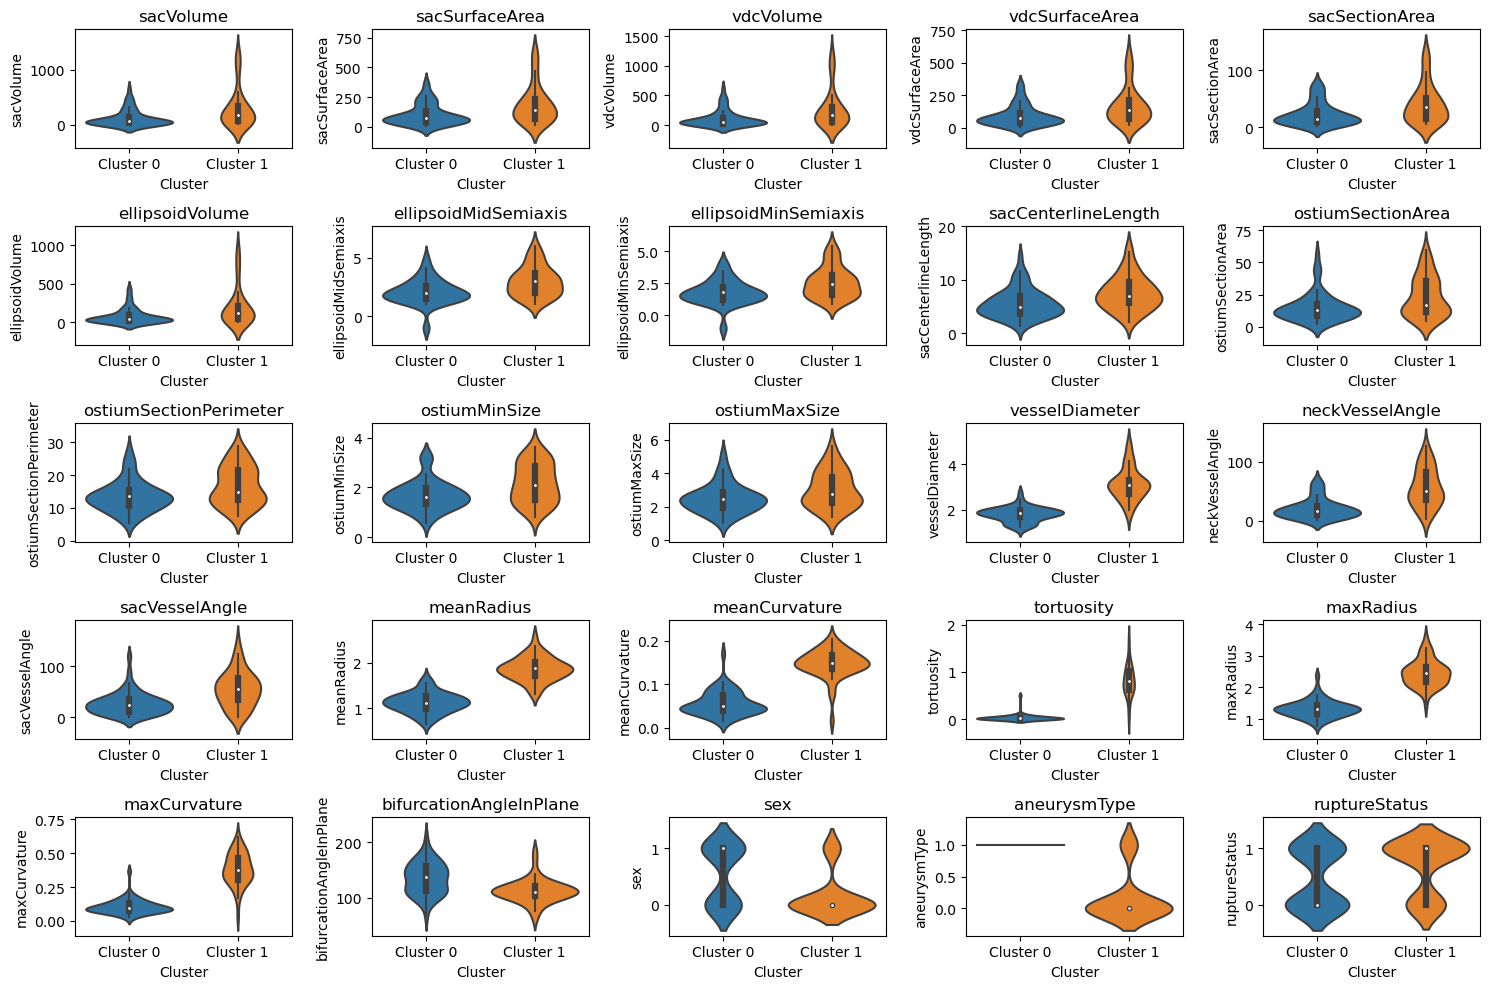

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features with significant differences based on p-values
significant_features = [
    'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
    'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMidSemiaxis', 
    'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea', 
    'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize', 
    'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
    'meanCurvature', 'tortuosity', 'maxRadius', 'maxCurvature', 
    'bifurcationAngleInPlane', 'sex', 'aneurysmType', 'ruptureStatus'
]

plt.figure(figsize=(15, 10))

# Plot each feature
for i, feature in enumerate(significant_features):
    plt.subplot(5, 5, i + 1)
    sns.violinplot(x='Cluster', y=feature, data=data)
    plt.title(feature)
    plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Group data by cluster and calculate summary statistics
cluster_summary = data.groupby('Cluster')[significant_features].agg(['mean', 'median', 'std']).T
cluster_summary.columns = ['Cluster 0', 'Cluster 1']

# Display the summary
print(cluster_summary)



                                 Cluster 0   Cluster 1
sacVolume               mean    124.635181  302.936329
                        median   62.688596  186.060713
                        std     149.120494  355.700855
sacSurfaceArea          mean    105.106283  190.760851
                        median   77.616954  141.325297
                        std      88.156064  160.702464
vdcVolume               mean    111.497397  275.638804
                        median   57.544869  166.289207
                        std     137.558304  324.016795
vdcSurfaceArea          mean     92.564232  171.864281
                        median   72.394490  134.074497
                        std      78.692726  142.748665
sacSectionArea          mean     23.341372   41.273160
                        median   14.996582   34.665744
                        std      20.127519   34.299740
ellipsoidVolume         mean     77.919420  200.646311
                        median   38.510434  114.074708
          

In [16]:
import pandas as pd

# Separate numerical and categorical features
categorical_features = ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']
numerical_features = [feature for feature in significant_features if feature not in categorical_features]

# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Group data by cluster and calculate summary statistics for numerical features
numerical_summary = data.groupby('Cluster')[numerical_features].agg(['mean', 'median', 'std']).T
numerical_summary.columns = ['Cluster 0', 'Cluster 1']

# Calculate counts and proportions for categorical features, handling NaN values
def calculate_categorical_summary(data, categorical_features):
    categorical_summary = {}
    for feature in categorical_features:
        summary = data.groupby('Cluster')[feature].value_counts(normalize=True).unstack().T
        summary.columns = [f'Cluster {int(col)}' for col in summary.columns]
        categorical_summary[feature] = summary
    return categorical_summary

categorical_summary = calculate_categorical_summary(data, categorical_features)

# Combine numerical and categorical summaries
combined_summary = numerical_summary.copy()
for feature, summary in categorical_summary.items():
    combined_summary = pd.concat([combined_summary, summary], axis=0)

# Display the summary
print(combined_summary)


                                    Cluster 0   Cluster 1
(sacVolume, mean)                  124.635181  302.936329
(sacVolume, median)                 62.688596  186.060713
(sacVolume, std)                   149.120494  355.700855
(sacSurfaceArea, mean)             105.106283  190.760851
(sacSurfaceArea, median)            77.616954  141.325297
(sacSurfaceArea, std)               88.156064  160.702464
(vdcVolume, mean)                  111.497397  275.638804
(vdcVolume, median)                 57.544869  166.289207
(vdcVolume, std)                   137.558304  324.016795
(vdcSurfaceArea, mean)              92.564232  171.864281
(vdcSurfaceArea, median)            72.394490  134.074497
(vdcSurfaceArea, std)               78.692726  142.748665
(sacSectionArea, mean)              23.341372   41.273160
(sacSectionArea, median)            14.996582   34.665744
(sacSectionArea, std)               20.127519   34.299740
(ellipsoidVolume, mean)             77.919420  200.646311
(ellipsoidVolu